## Import Libraries

In [ ]:
# Install needed library
!pip install pandas-profiling

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ydata_profiling as pp
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statistics
import warnings

# Hide warning messages
warnings.filterwarnings("ignore")

##Data Understanding and Exploration

In [ ]:
# Read the CSV file into a DataFrame
df_raw = pd.read_csv('/content/user_data.csv')

# Display the first few rows of the DataFrame
df_raw.head()

,userId,gender,age,maritalStatus,jobStatus,monthlyExpenses ($),monthlyIncome ($),phoneBrand,socialMediaConsumption (hr/day),hobbies
0,1,Female,26,Divorced,Student,1444,2461,Huawei,1,Painting
1,2,Female,60,Single,Employed,4248,4540,Apple,4,Gardening
2,3,Male,55,Single,Retired,2822,3364,Apple,4,Reading
3,4,Female,62,Divorced,Unemployed,1455,4325,Apple,2,Painting
4,5,Male,29,Divorced,Self-employed,3817,3494,Xiaomi,3,Cycling


In [ ]:
# Display information about the DataFrame
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   userId                           5000 non-null   int64 
 1   gender                           5000 non-null   object
 2   age                              5000 non-null   int64 
 3   maritalStatus                    5000 non-null   object
 4   jobStatus                        5000 non-null   object
 5   monthlyExpenses ($)              5000 non-null   int64 
 6   monthlyIncome ($)                5000 non-null   int64 
 7   phoneBrand                       5000 non-null   object
 8   socialMediaConsumption (hr/day)  5000 non-null   int64 
 9   hobbies                          5000 non-null   object
dtypes: int64(5), object(5)
memory usage: 390.8+ KB


In [ ]:
# Iterate through each column in the dataframe
unique_values = {}
for column in df_raw.columns:
    unique_values[column] = df_raw[column].value_counts()

# Print the unique values and counts for each column
for column, values in unique_values.items():
    print(f"Column: {column}")
    print(values)
    print()

Column: userId
1       1
3331    1
3338    1
3337    1
3336    1
       ..
1667    1
1666    1
1665    1
1664    1
5000    1
Name: userId, Length: 5000, dtype: int64

Column: gender
Male      2537
Female    2463
Name: gender, dtype: int64

Column: age
67    119
54    118
35    117
58    110
25    110
18    109
66    109
36    109
55    108
29    108
20    107
56    102
62    101
49    101
60     99
31     98
41     97
28     97
38     97
44     96
61     96
63     96
30     96
40     95
48     95
45     95
39     95
65     94
52     94
47     93
42     93
50     93
37     93
64     93
53     92
32     91
22     91
57     91
23     90
68     90
24     89
27     89
51     87
46     86
26     86
59     85
34     85
33     85
19     85
69     85
21     83
43     77
Name: age, dtype: int64

Column: maritalStatus
Single      1705
Married     1666
Divorced    1629
Name: maritalStatus, dtype: int64

Column: jobStatus
Employed         1042
Retired          1021
Student           994
Self-employ


Based on the provided information, we can conclude that:

*  The DataFrame contains a total of 5000 rows.
*  All columns have 5000 non-null values, indicating that there are no missing values in any of the columns.
*  The DataFrame has 10 columns with the following names:
1. userId: This column represents the unique identifier of each user. It contains integer values.
2. gender: This column represents the gender of each user. It contains categorical values in the form of strings (object data type).
3. age: This column represents the age of each user. It contains integer values.
4. maritalStatus: This column represents the marital status of each user. It contains categorical values in the form of strings (object data type).
5. jobStatus: This column represents the job status of each user. It contains categorical values in the form of strings (object data type).
6. monthlyExpenses (\$\): This column represents the monthly expenses of each user in dollars. It contains integer values.
7. monthlyIncome (\$\): This column represents the monthly income of each user in dollars. It contains integer values.
8. phoneBrand: This column represents the brand of the phone used by each user. It contains categorical values in the form of strings (object data type).
9. socialMediaConsumption (hr/day): This column represents the daily social media consumption in hours for each user. It contains integer values.
10. hobbies: This column represents the hobbies of each user. It contains categorical values in the form of strings (object data type).

Since Iphone is Apple product, let's assign Iphone to Apple


In [ ]:
# Drop the 'userId' column from the dataframe
df_raw1 = df_raw.drop(columns=['userId'])
df_raw1['socialMediaConsumption (hr/day)'].astype(str).astype(int)

# Phone Brand Re-Assign
df_raw1['phoneBrand'] = df_raw1['phoneBrand'].map(lambda x: 'Apple' if x in ['iPhone'] else x)

In [ ]:
# Generate a profile report using pandas_profiling
profile = pp.ProfileReport(df_raw1)

# Display the profile report in the notebook as an interactive iframe
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

From the provided data, here are some useful insights and interesting trends:

1.	Gender: The dataset is nearly balanced between male and female users, with 50.7% male and 49.3% female.
2.	Age: The age of the users ranges from 18 to 69, with a mean age of 43.68. The data has a slight negative skewness and a kurtosis value indicating a relatively flat distribution. The majority of users fall within the interquartile range of 31 to 57.
3.	Marital Status: The dataset consists of users with different marital statuses. The most common categories are single (34.1%), married (33.3%), and divorced (32.6%). This suggests a relatively even distribution among the marital status groups.
4.	Job Status: The users have various job statuses, including employed (20.8%), retired (20.4%), student (19.9%), self-employed (19.8%), and unemployed (19.0%). This indicates a diverse representation of different employment statuses in the dataset.
5.	Monthly Expenses and Income: The average monthly expenses of the users is approximately \$3,002.15, with a standard deviation of \$1,156.68. The average monthly income is around \$4,491.37, with a standard deviation of \$1,444.33. The data for both expenses and income exhibits a slight negative skewness and a kurtosis value indicating a relatively flat distribution.
6.	Phone Brand: The dataset includes users with various phone brands. The most common phone brands among the users are Apple (28.7%), Google Pixel (14.9%), Xiaomi (14.8%), Samsung (14.2%), OnePlus (13.8%), and Huawei (13.6%).
7.	Social Media Consumption: The users' social media consumption varies, with the majority spending 2 to 4 hours per day. The distribution shows that 26.5% of users consume social media for 4 hours, followed by 25.3% for 2 hours, 24.6% for 3 hours, and 23.6% for 1 hour with average of 2.54 hours per day.
8.	Hobbies: The dataset includes users with different hobbies. The most common hobbies among the users are reading (10.6%), yoga (10.6%), fishing (10.3%), cycling (10.2%), painting (10.1%), and photography (9.9%).
9. Age and Monthly Expenses: There is a very weak positive correlation (0.006) between age and monthly expenses. This suggests that age does not have a strong influence on the amount of monthly expenses.
10. Age and Monthly Income: Similarly, there is a very weak positive correlation (0.004) between age and monthly income. This indicates that age alone does not strongly determine the level of monthly income.
11. Gender and Monthly Income: There is a weak positive correlation (0.060) between gender and monthly income. This indicates that gender has a minimal influence on monthly income.
12. Marital Status and Job Status: There is a weak positive correlation (0.042) between marital status and job status. This indicates that certain marital statuses may be associated with specific job statuses.
13. Phone Brand and Job Status: There is a weak positive correlation (0.018) between phone brand and job status. This suggests that there might be some relationship between the type of phone brand a user prefers and their job status, although the correlation is not significant.
14. Social Media Consumption and Age: There is a weak positive correlation (0.017) between social media consumption and age. This indicates that age has a minimal impact on the amount of time spent on social media.


In [ ]:
# Specify the object columns to iterate over
object_columns = ['gender', 'maritalStatus', 'jobStatus', 'phoneBrand', 'hobbies']

# Iterate over object columns
for column in object_columns:
    # Group the dataframe by the current column
    grouped_column = df_raw1.groupby(column)

    # Iterate over groups
    for value, group_df in grouped_column:
        print(f"{column} {value}:")
        print("----------------")

        # Unique values and percentages for categorical columns
        categorical_columns = ['gender', 'maritalStatus', 'jobStatus', 'phoneBrand', 'hobbies']
        for col in categorical_columns:
            if col != column:
                unique_values = group_df[col].unique()
                print(f"{col}:")
                
                # Calculate value counts and sort by percentages in descending order
                value_counts = group_df[col].value_counts(normalize=True) * 100
                sorted_counts = value_counts.sort_values(ascending=False)
                
                # Print the sorted values and percentages
                for value, count in sorted_counts.items():
                    print(f"{value}: {count:.2f}%")
                
                print()

        # Min, max, and average for numeric columns
        numeric_columns = ['age', 'monthlyExpenses ($)', 'monthlyIncome ($)', 'socialMediaConsumption (hr/day)']
        for col in numeric_columns:
            col_min = group_df[col].min()
            col_max = group_df[col].max()
            col_avg = group_df[col].mean()
            col_std = group_df[col].std()

            # Determine the income level based on average monthly income
            if col == 'monthlyIncome ($)':
                avg_income = col_avg
                above_avg = avg_income + col_std
                below_avg = avg_income - col_std

                if below_avg <= avg_income <= above_avg:
                    income_level = "Average"
                elif avg_income > above_avg:
                    income_level = "Above Average"
                else:
                    income_level = "Below Average"

                print(f"{col}: {col_min.round(2)} - {col_max.round(2)}, ({col_avg.round(2)}) [{income_level}]")
            elif col == 'monthlyExpenses ($)':
                avg_expenses = col_avg
                above_avg = avg_expenses + col_std
                below_avg = avg_expenses - col_std

                if below_avg <= avg_expenses <= above_avg:
                    expenses_level = "Average"
                elif avg_expenses > above_avg:
                    expenses_level = "Above Average"
                else:
                    expenses_level = "Below Average"

                print(f"{col}: {col_min.round(2)} - {col_max.round(2)}, ({col_avg.round(2)}) [{expenses_level}]")
            elif col == 'socialMediaConsumption (hr/day)':
                avg_social_media = col_avg
                above_avg = avg_social_media + col_std
                below_avg = avg_social_media - col_std

                if below_avg <= avg_social_media <= above_avg:
                    social_media_level = "Average"
                elif avg_social_media > above_avg:
                    social_media_level = "Above Average"
                else:
                    social_media_level = "Below Average"

                print(f"{col}: {col_min.round(2)} - {col_max.round(2)}, ({col_avg.round(2)}) [{social_media_level}]")
            else:
                print(f"{col}: {col_min.round(2)} - {col_max.round(2)}, ({col_avg.round(2)})")

            print()

        print("================")


gender Female:
----------------
maritalStatus:
Married: 34.06%
Single: 33.74%
Divorced: 32.20%

jobStatus:
Employed: 21.19%
Retired: 20.58%
Student: 20.50%
Unemployed: 19.16%
Self-employed: 18.55%

phoneBrand:
Apple: 27.37%
Google Pixel: 15.35%
OnePlus: 14.49%
Samsung: 14.41%
Xiaomi: 14.29%
Huawei: 14.09%

hobbies:
Yoga: 11.53%
Reading: 10.52%
Cycling: 10.27%
Photography: 10.23%
Golfing: 9.83%
Fishing: 9.78%
Gardening: 9.62%
Painting: 9.50%
Traveling: 9.46%
Cooking: 9.26%

age: 18 - 69, (43.73)

monthlyExpenses ($): 1002 - 4999, (2995.08) [Average]

monthlyIncome ($): 2000 - 6998, (4504.18) [Average]

socialMediaConsumption (hr/day): 1 - 4, (2.53) [Average]

gender Male:
----------------
maritalStatus:
Single: 34.45%
Divorced: 32.95%
Married: 32.60%

jobStatus:
Self-employed: 21.05%
Employed: 20.50%
Retired: 20.26%
Student: 19.27%
Unemployed: 18.92%

phoneBrand:
Apple: 29.96%
Xiaomi: 15.25%
Google Pixel: 14.54%
Samsung: 13.91%
OnePlus: 13.17%
Huawei: 13.17%

hobbies:
Reading: 10.76%
Fi

* There are no significant differences between the "Female" and "Male" gender groups.
* There are no significant differences between the "Divorced," "Married," and "Single" maritalStatus groups.
* There are no significant differences between the "Employed," "Retired," "Self-employed," "Student," and "Unemployed" jobStatus groups.
* There are no significant differences between the "Apple", "Xiaomi", "OnePlus","Google Pixel", "Samsung",and "Huawei"
phoneBrand group.
* There are no significant differences observed between the groups in terms of their hobbies.

## Feature Engineering

In [ ]:
# Make new dataframe from df_raw1
df_raw2 = df_raw1.copy()

This line creates a copy of the original dataframe df_raw1 to work with and avoid modifying the original data.

In [ ]:
# Age Group
# Define the age ranges for each group
age_groups = [18, 27, 43, 59, 69]

# Assign group names to each age range generations
group_names = ['Gen Z', 'Millennials', 'Gen X', 'Boomers']

# Create a new column for age groups in the DataFrame
df_raw2['age_group'] = pd.cut(df_raw2['age'], bins=age_groups, labels=group_names, include_lowest=True)


The  code is used to categorize individuals into different age groups based on their age. The code first defines a list of age ranges called `age_groups`. These ranges represent the boundaries for each age group. Then, another list called `group_names` is defined to assign corresponding group names to each age range generation.

Overall, this code allows for easy analysis and segmentation of data based on age groups, facilitating tasks such as demographic analysis or targeted marketing strategies.

In [ ]:
# Job Status Group
# Create a dictionary mapping Job Status
jobStatus_mapping = {'Employed': 'Working Professionals',
                      'Retired': 'Non-Working Individuals',
                      'Student': 'Student',
                      'Self-employed': 'Working Professionals',
                      'Unemployed': 'Non-Working Individuals'}
# Create a new column 'jobStatus_group' based on the mapped values
df_raw2['jobStatus_group'] = df_raw2['jobStatus'].map(jobStatus_mapping)

The code is used to categorize individuals into different job status groups based on their job status. It starts by creating a dictionary called `jobStatus_mapping`, which maps each job status category to a corresponding group name. 'Employed' and 'Self-employed' are categorized as 'Working Professionals', 'Retired' and 'Unemployed' are categorized as 'Non-Working Individuals', and 'Student' remains as 'Student'.

This code simplifies the process of categorizing individuals based on their job status, allowing for easy analysis and segmentation of data. It can be helpful in various scenarios such as demographic analysis, market research, or targeted marketing strategies that require understanding the characteristics and preferences of different job status groups.

In [ ]:
# Calculate Expense to Income Ratio
df_raw2['expense_income_ratio'] = df_raw2['monthlyExpenses ($)'] / df_raw2['monthlyIncome ($)']

# Define the Expense to Income Ratio for each group
categories = [0, 0.5, 2.5]

# Assign group names to each age range generations
categories_names = ['Low Expense to Income Ratio', 'High Expense to Income Ratio']

# Create a new column for age groups in the DataFrame
df_raw2['expense_income_cat'] = pd.cut(df_raw2['expense_income_ratio'], bins=categories, labels=categories_names, include_lowest=True)

The code is used to calculate and categorize the expense to income ratio for individuals in a DataFrame called `df_raw2`. It first calculates the expense to income ratio by dividing the 'monthlyExpenses (\$)' column by the 'monthlyIncome (\$)' column and assigns the result to a new column named 'expense_income_ratio'.

Next, a list called `categories` is defined to represent the boundaries for different expense to income ratio groups. The code then defines another list called `categories_names` to assign corresponding group names to each expense to income ratio category.

This code enables the analysis and segmentation of individuals based on their expense to income ratio, allowing for a better understanding of their financial health or risk profile. It can be useful in financial planning, risk assessment, or identifying individuals who may require financial assistance or guidance.

In [ ]:
# Calculate the mean and standard deviation for socialMediaConsumption
social_media_mean = df_raw2['socialMediaConsumption (hr/day)'].mean()
social_media_std = df_raw2['socialMediaConsumption (hr/day)'].std()

# Define function to categorize the values
def categorize_social_media(social_media):
    if social_media > (social_media_mean + social_media_std):
        return 'Above Average'
    elif social_media < (social_media_mean - social_media_std):
        return 'Below Average'
    else:
        return 'Average'

# Apply the categorization function to create the 'social_media_category' column
df_raw2['social_media_category'] = df_raw2['socialMediaConsumption (hr/day)'].apply(categorize_social_media)

The code is used to calculate the mean and standard deviation for the 'socialMediaConsumption (hr/day)' column in the DataFrame `df_raw2`. The social media consumption categorized into three categories: 'Above Average', 'Below Average', and 'Average'. The categorization is based on a comparison of each value with the mean and standard deviation. If a value is greater than the mean plus one standard deviation, it is classified as 'Above Average'. If it is lower than the mean minus one standard deviation, it is labeled as 'Below Average'. Otherwise, it is categorized as 'Average'.

This code allows for the categorization of social media consumption levels based on a statistical analysis using the mean and standard deviation. It helps identify individuals with high or low social media consumption compared to the average, providing insights into user behavior and allowing for targeted interventions or analyses related to social media usage patterns.

In [ ]:
# Phone Brand Group
# Create a dictionary mapping phone Brand
phoneBrand_mapping = {
    'Google Pixel': 'High-end', 
    'Xiaomi' : 'Entry Mid-Level',
    'Samsung' : 'High-end',
    'Apple': 'High-end', 
    'OnePlus'  : 'Entry Mid-Level', 
    'Huawei'  : 'Entry Mid-Level'}
# Create a new column 'phoneBrand_category' based on the mapped values
df_raw2['phoneBrand_category'] = df_raw2['phoneBrand'].map(phoneBrand_mapping)

The provided code is designed to categorize different phone brands into specific categories based on their brand type. The categorization is determined by considering the average price range of each brand. The mapping is as follows:

- 'Apple', 'Google Pixel', and 'Samsung' are categorized as 'High-end' due to their higher average price range, ranging from \$800 to \$1,500 for Apple, \$600 to \$1,000 for Google Pixel, and \$600 to \$1,200 for Samsung.
- 'Xiaomi', 'OnePlus', and 'Huawei' are categorized as 'Entry Mid-Level' because their average price ranges fall within the lower range, ranging from \$200 to \$\500 for Xiaomi, \$500 to \$800 for OnePlus, and \$200 to \$600 for Huawei.

This code simplifies the process of categorizing phone brands based on their average price range, enabling easy data analysis and segmentation. It proves beneficial for various purposes such as market research, understanding consumer preferences, or identifying different market segments based on phone brand choices.

In [ ]:
#Hobby Group
# Create a dictionary mapping similar hobbies to a common category
hobby_mapping = {
    'Reading': 'Creative-Intellectual Activities',
    'Yoga': 'Physical-Outdoor Activities',
    'Fishing': 'Physical-Outdoor Activities',
    'Cycling': 'Physical-Outdoor Activities',
    'Painting': 'Creative-Intellectual Activities',
    'Photography': 'Creative-Intellectual Activities',
    'Golfing': 'Physical-Outdoor Activities',
    'Gardening': 'Physical-Outdoor Activities',
    'Traveling': 'Physical-Outdoor Activities',
    'Cooking': 'Creative-Intellectual Activities'}
# Create a new column 'hobby_category' based on the mapped values
df_raw2['hobby_category'] = df_raw2['hobbies'].map(hobby_mapping)

The code is used to categorize different hobbies into specific categories based on their characteristics. It starts by creating a dictionary called `hobby_mapping`, which maps each hobby to a common category. For example, 'Reading', 'Painting', and 'Photography' are categorized as 'Creative-Intellectual Activities', while 'Yoga', 'Fishing', and 'Cycling' are categorized as 'Physical-Outdoor Activities'. 

This code simplifies the process of categorizing hobbies into specific categories, allowing for easy analysis and segmentation of data. It can be useful for various purposes such as understanding user interests, personalization of recommendations, or identifying common patterns and preferences among individuals with similar hobbies.

In [ ]:
#Dropping some of the redundant and unused features
df_raw3 = df_raw2.drop(columns=['gender', 'maritalStatus', 'age', 'jobStatus', 'monthlyIncome ($)', 'monthlyExpenses ($)',
                                'phoneBrand', 'socialMediaConsumption (hr/day)', 'hobbies',
                                'expense_income_ratio'])

df_raw3.head()

,age_group,jobStatus_group,expense_income_cat,social_media_category,phoneBrand_category,hobby_category
0,Gen Z,Student,High Expense to Income Ratio,Below Average,Entry Mid-Level,Creative-Intellectual Activities
1,Boomers,Working Professionals,High Expense to Income Ratio,Above Average,High-end,Physical-Outdoor Activities
2,Gen X,Non-Working Individuals,High Expense to Income Ratio,Above Average,High-end,Creative-Intellectual Activities
3,Boomers,Non-Working Individuals,Low Expense to Income Ratio,Average,High-end,Creative-Intellectual Activities
4,Millennials,Working Professionals,High Expense to Income Ratio,Average,Entry Mid-Level,Physical-Outdoor Activities


The decision to exclude the 'gender' and 'marital' status features from the clustering process is based on the understanding that these factors might not have strong correlations or direct contributions to the patterns and structures being analyzed. This is because 'gender' and 'marital' status are subjective and socially influenced variables that may not align closely with other variables in the dataset.

While, other features such as 'age', 'jobStatus', 'monthlyIncome (\$)', 'monthlyExpenses (\$)', 'phoneBrand', 'socialMediaConsumption (hr/day)', 'hobbies', and 'expense_income_ratio' are excluded because they are represented by new feature.

In [ ]:
# Encoding categorical variables using one-hot encoding
X_encoded = pd.get_dummies(df_raw3)

# Feature scaling using StandardScaler
sc = StandardScaler()
sc.fit(X_encoded)
X_std = sc.transform(X_encoded)

# Print the shape of the standardized feature matrix
X_std.shape

(5000, 16)

By performing one-hot encoding and standardization, the code prepares the data for further analysis or modeling tasks. One-hot encoding ensures that categorical variables are appropriately represented numerically, while standardization helps to normalize the numerical features for improved model performance.

In [ ]:
# Perform Principal Component Analysis (PCA) with 0.95 variance explained ratio
pca = PCA(n_components=0.95)

# Fit PCA on the standardized feature matrix X_std
pca.fit(X_std)

# Transform the standardized feature matrix X_std using the computed PCA model
X_pca = pca.transform(X_std)

# Print the shape of the transformed feature matrix X_pca
X_pca.shape

(5000, 10)

The purpose of this code snippet is to perform dimensionality reduction using PCA, reducing the feature space while preserving as much of the original variance as possible. By specifying a variance explained ratio of 0.95, the code selects the optimal number of principal components needed to explain at least 95% of the variance in the data. This can help in reducing the complexity of the data, removing redundant features, and potentially improving the performance of downstream machine learning models.

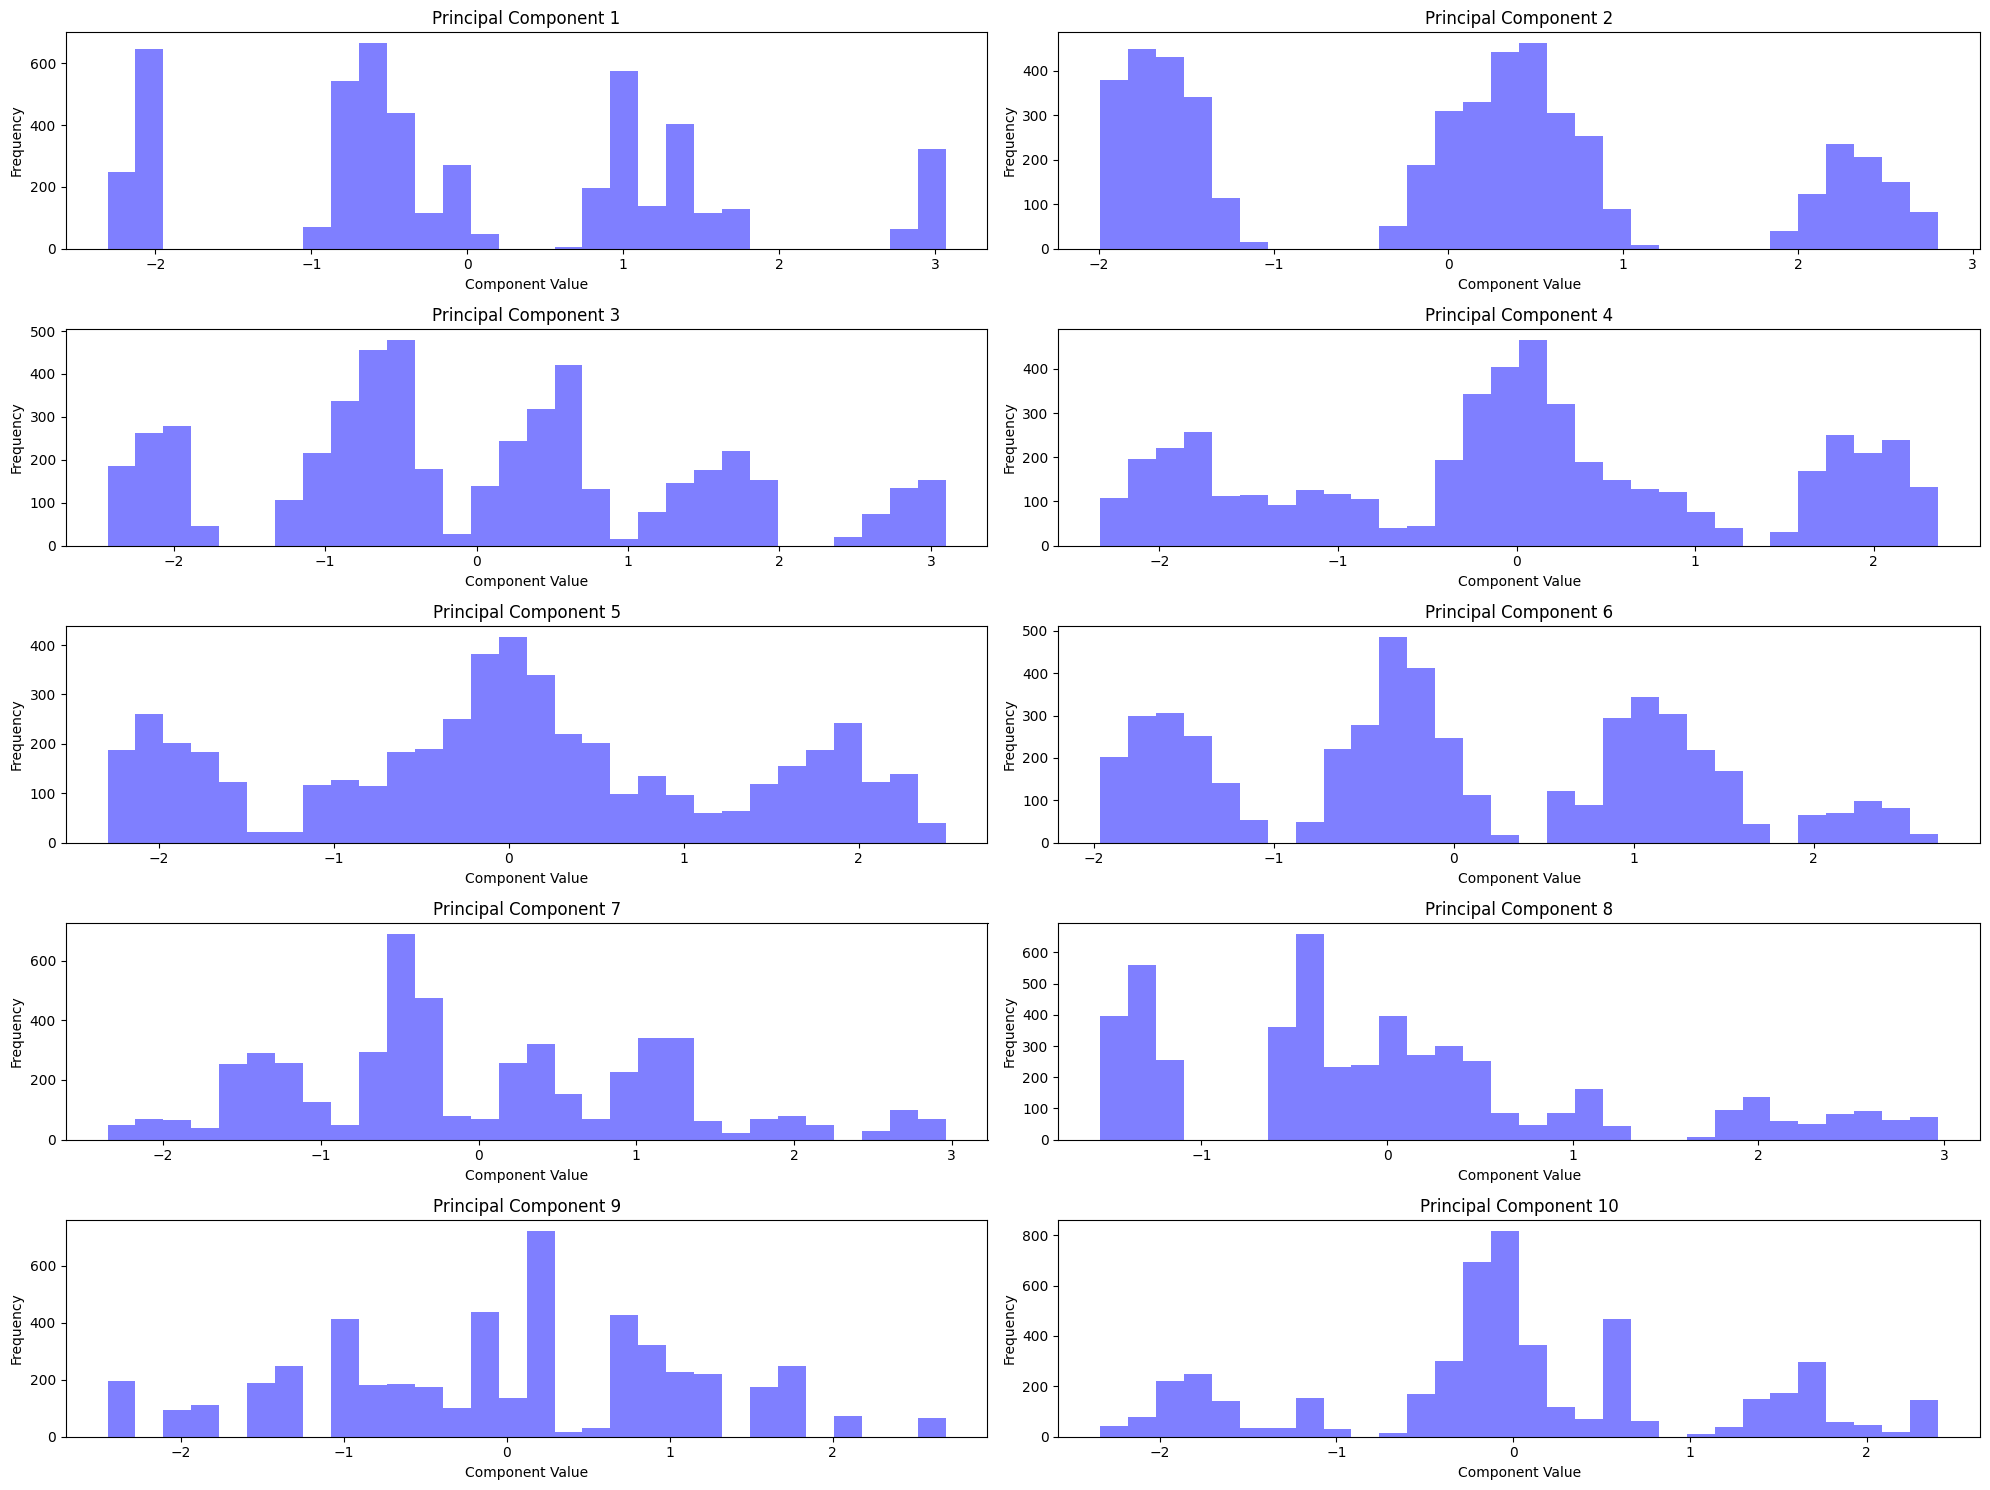

In [ ]:
# Plotting the distribution of each principal component
num_components = X_pca.shape[1]

# Set the number of subplots based on the number of components
rows = (num_components + 1) // 2
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(20, 15))

# Flatten the axes array to simplify indexing in the loop
axes = axes.flatten()

# Loop over each component and plot its distribution
for i in range(num_components):
    ax = axes[i]
    ax.hist(X_pca[:, i], bins=30, color='blue', alpha=0.5)
    ax.set_title('Principal Component {}'.format(i+1))
    ax.set_xlabel('Component Value')
    ax.set_ylabel('Frequency')

# Hide any unused subplots
if num_components < len(axes):
    for j in range(num_components, len(axes)):
        axes[j].axis('off')

plt.tight_layout()
plt.show()

From this graph we can conclude that the data is non-Gaussian.

## Possible Personas that Might Exist

In [ ]:
# Generate a profile report using pandas_profiling
profile2 = pp.ProfileReport(df_raw3)

# Display the profile report in the notebook as an interactive iframe
profile2.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Specify the object columns to iterate over
object_columns = ['age_group', 'jobStatus_group', 'expense_income_cat', 'social_media_category', 'phoneBrand_category', 'hobby_category']

# Iterate over object columns
for column in object_columns:
    # Group the dataframe by the current column
    grouped_column = df_raw3.groupby(column)

    # Iterate over groups
    for value, group_df in grouped_column:
        print(f"{column} {value}:")
        print("----------------")

        # Unique values and percentages for categorical columns
        categorical_columns = ['age_group', 'jobStatus_group', 'expense_income_cat', 'social_media_category', 'phoneBrand_category', 'hobby_category']
        for col in categorical_columns:
            if col != column:
                unique_values = group_df[col].unique()
                print(f"{col}:")
                
                # Calculate value counts and sort by percentages in descending order
                value_counts = group_df[col].value_counts(normalize=True) * 100
                sorted_counts = value_counts.sort_values(ascending=False)
                
                # Print the sorted values and percentages
                for value, count in sorted_counts.items():
                    print(f"{value}: {count:.2f}%")
                
                print()

        print("================")

age_group Gen Z:
----------------
jobStatus_group:
Working Professionals: 40.26%
Non-Working Individuals: 39.62%
Student: 20.13%

expense_income_cat:
High Expense to Income Ratio: 68.26%
Low Expense to Income Ratio: 31.74%

social_media_category:
Average: 51.33%
Above Average: 26.20%
Below Average: 22.47%

phoneBrand_category:
High-end: 58.47%
Entry Mid-Level: 41.53%

hobby_category:
Physical-Outdoor Activities: 60.28%
Creative-Intellectual Activities: 39.72%

age_group Millennials:
----------------
jobStatus_group:
Working Professionals: 41.81%
Non-Working Individuals: 39.92%
Student: 18.26%

expense_income_cat:
High Expense to Income Ratio: 67.65%
Low Expense to Income Ratio: 32.35%

social_media_category:
Average: 48.34%
Above Average: 28.25%
Below Average: 23.42%

phoneBrand_category:
High-end: 56.88%
Entry Mid-Level: 43.12%

hobby_category:
Physical-Outdoor Activities: 60.27%
Creative-Intellectual Activities: 39.73%

age_group Gen X:
----------------
jobStatus_group:
Working Profe

Based on the provided dataset, we can identify several possible personas. Each persona represents a group of users who share similar characteristics.

1. Active Scholars
2. Affluent Boomers
3. Artistic Budget-Conscious
4. Artistic Enthusiasts
5. Cultured Connoisseurs
6. Energetic Gen Z Explorers
7. Millennial Trendsetters
8. Nature Explorers
9. Practical Gen Xers
10. Tech Enthusiasts

## Gaussian Mixture Models and Model Evaluation

Gaussian Mixture Models (GMMs) are a powerful tool for clustering data, particularly when dealing with non-Gaussian distributed data and the presence of overlapping clusters. GMMs provide a flexible framework that can capture complex patterns and distributions in the data by modeling each cluster as a combination of multiple Gaussian distributions.

When the underlying data distribution does not strictly adhere to Gaussian assumptions, GMMs can still be effective as they are capable of approximating a wide range of distributions. This makes GMMs suitable for datasets where the clusters exhibit complex shapes or have multiple modes.

Moreover, GMMs excel in scenarios where overlapping clusters are present. Unlike some other clustering algorithms that assign data points to a single cluster, GMMs assign probabilities to each point belonging to different clusters. This probabilistic approach allows for the modeling of overlapping clusters, as data points can be shared between multiple clusters based on their likelihoods.

By utilizing GMMs, one can gain insights into the underlying structure of the data, identify overlapping regions, and capture the uncertainty in cluster assignments. GMMs are commonly used in various domains, such as image segmentation, customer segmentation, and anomaly detection, where the data distribution is not strictly Gaussian and the presence of overlapping clusters is expected.

In [ ]:
# Importing necessary libraries
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.mixture import GaussianMixture
import itertools

In [ ]:
# Perform clustering with Gaussian Mixture Models (GMM) on the reduced dimensions
gmm = GaussianMixture(n_components=10, random_state=0)
gmm.fit(X_pca)
cluster_labels = gmm.predict(X_pca)
cluster_proba = gmm.predict_proba(X_pca)

# Assign cluster labels and probabilities to the original dataset
df_gmm = df_raw2.copy()
df_gmm['cluster'] = cluster_labels
df_gmm['cluster_proba'] = pd.DataFrame(cluster_proba).apply(lambda x: ", ".join([f"{val:.2f}" for val in x]), axis=1)

# Print the cluster and the corresponding number of users in each cluster
cluster_counts = df_gmm['cluster'].value_counts()
print(cluster_counts)

# Compute the Silhouette Score
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print("Silhouette Score:", silhouette_avg)

# Compute the Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X_pca, cluster_labels)
print("Calinski-Harabasz Index:", calinski_harabasz)

# Compute the Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_pca, cluster_labels)
print("Davies-Bouldin Index:", davies_bouldin)


9    982
1    959
6    806
3    615
0    587
8    478
7    225
2    196
4     88
5     64
Name: cluster, dtype: int64
Silhouette Score: 0.08076159493137734
Calinski-Harabasz Index: 301.5805899185258
Davies-Bouldin Index: 1.9906323893287445


* Silhouette Score: The silhouette score measures the quality of clustering results by computing the average distance between samples within clusters and the average distance between samples in different clusters. A higher silhouette score indicates better-defined and well-separated clusters. In this case, the silhouette score of 0.081 suggests that the clusters have some degree of separation, but there may be overlap or ambiguity in the clustering.

* Calinski-Harabasz Index: The Calinski-Harabasz index is another measure of cluster validity. It evaluates the ratio of between-cluster dispersion to within-cluster dispersion. A higher Calinski-Harabasz index indicates better-defined and dense clusters. The obtained Calinski-Harabasz index of 301.581 suggests that the clusters are relatively well-separated and distinct from each other.

* Davies-Bouldin Index: The Davies-Bouldin index measures the average similarity between clusters, where a lower value indicates better-defined clusters. The obtained Davies-Bouldin index of 1.991 suggests moderate to good clustering quality, but there may be overlapping regions or ambiguity in cluster assignments.

These evaluation metrics serve as useful tools to assess the performance and quality of clustering algorithms. They provide quantitative measures of cluster separation, density, and similarity. By considering multiple metrics, we can obtain a more comprehensive understanding of the clustering results and make comparisons between different algorithms or parameter settings. In this specific case, the Gaussian Mixture Models algorithm demonstrates moderate cluster separation, density, and similarity, as indicated by the obtained scores.

## Persona Assignment

In [ ]:
# Group the dataframe by cluster
grouped_df_gmm = df_gmm.groupby('cluster')

# Iterate over each cluster
for cluster, cluster_df in grouped_df_gmm:
    print(f"Cluster {cluster}:")
    print("----------------")
    
    # Unique values and percentages for categorical columns
    categorical_columns = ['gender', 'maritalStatus', 'jobStatus', 'phoneBrand',
                           'hobbies', 'age_group', 'jobStatus_group', 
                           'expense_income_cat', 'social_media_category', 
                           'phoneBrand_category', 'hobby_category']
    for col in categorical_columns:
        unique_values = cluster_df[col].unique()
        print(f"{col}:")
        
        # Calculate value counts and sort by percentages in descending order
        value_counts = cluster_df[col].value_counts(normalize=True) * 100
        sorted_counts = value_counts.sort_values(ascending=False)
        
        # Print the sorted values and percentages
        for value, count in sorted_counts.items():
            print(f"{value}: {count:.2f}%")
        
        print()
    
    # Min, max, and average for numeric columns
    numeric_columns = ['age', 'monthlyExpenses ($)', 'monthlyIncome ($)', 
                       'socialMediaConsumption (hr/day)']
    for col in numeric_columns:
        col_min = cluster_df[col].min()
        col_max = cluster_df[col].max()
        col_avg = cluster_df[col].mean()
        col_std = cluster_df[col].std()
        
        # Determine the income level based on average monthly income
        if col == 'monthlyIncome ($)':
            avg_income = col_avg
            above_avg = avg_income + col_std
            below_avg = avg_income - col_std
            
            if below_avg <= avg_income <= above_avg:
                income_level = "Average"
            elif avg_income > above_avg:
                income_level = "Above Average"
            else:
                income_level = "Below Average"
            
            print(f"{col}: {col_min.round(2)} - {col_max.round(2)}, ({col_avg.round(2)}) [{income_level}]")
        elif col == 'monthlyExpenses ($)':
            avg_expenses = col_avg
            above_avg = avg_expenses + col_std
            below_avg = avg_expenses - col_std
            
            if below_avg <= avg_expenses <= above_avg:
                expenses_level = "Average"
            elif avg_expenses > above_avg:
                expenses_level = "Above Average"
            else:
                expenses_level = "Below Average"
            
            print(f"{col}: {col_min.round(2)} - {col_max.round(2)}, ({col_avg.round(2)}) [{expenses_level}]")
        elif col == 'socialMediaConsumption (hr/day)':
            avg_social_media = col_avg
            above_avg = avg_social_media + col_std
            below_avg = avg_social_media - col_std
            
            if below_avg <= avg_social_media <= above_avg:
                social_media_level = "Average"
            elif avg_social_media > above_avg:
                social_media_level = "Above Average"
            else:
                social_media_level = "Below Average"
            
            print(f"{col}: {col_min.round(2)} - {col_max.round(2)}, ({col_avg.round(2)}) [{social_media_level}]")
        else:
            print(f"{col}: {col_min.round(2)} - {col_max.round(2)}, ({col_avg.round(2)})")
        
        print()
        
    print("================")


Cluster 0:
----------------
gender:
Female: 51.11%
Male: 48.89%

maritalStatus:
Single: 35.43%
Married: 33.22%
Divorced: 31.35%

jobStatus:
Employed: 31.86%
Self-employed: 24.02%
Unemployed: 22.83%
Retired: 21.29%

phoneBrand:
Apple: 31.69%
Google Pixel: 18.06%
Huawei: 13.46%
Xiaomi: 13.29%
OnePlus: 12.78%
Samsung: 10.73%

hobbies:
Cycling: 12.78%
Golfing: 12.78%
Traveling: 11.75%
Yoga: 11.24%
Gardening: 11.07%
Fishing: 9.88%
Reading: 9.20%
Painting: 7.67%
Photography: 7.67%
Cooking: 5.96%

age_group:
Millennials: 68.65%
Gen X: 31.35%
Gen Z: 0.00%
Boomers: 0.00%

jobStatus_group:
Working Professionals: 55.88%
Non-Working Individuals: 44.12%

expense_income_cat:
Low Expense to Income Ratio: 100.00%
High Expense to Income Ratio: 0.00%

social_media_category:
Average: 48.89%
Below Average: 25.72%
Above Average: 25.38%

phoneBrand_category:
High-end: 60.48%
Entry Mid-Level: 39.52%

hobby_category:
Physical-Outdoor Activities: 69.51%
Creative-Intellectual Activities: 30.49%

age: 28 - 59, (

* Cluster 0 matches the persona "Nature Explorers." This persona reflects the cluster's low expense to income ratio and their inclination towards engaging more in physical-outdoor activities. It implies that this group of individuals enjoys exploring and immersing themselves in nature, prioritizing outdoor experiences and adventures over high expenses. The low expense to income ratio suggests that they are resourceful in finding cost-effective ways to enjoy outdoor activities and appreciate the beauty of the natural world.

* Cluster 1 matches the persona "Tech Enthusiasts." This persona reflects the cluster's high expense to income ratio and their preference for high-end phones. It implies that this group of individuals is passionate about technology and values having the latest and most advanced devices, despite the higher cost associated with them. Their high expense to income ratio indicates a willingness to invest in technology to stay up-to-date with the latest trends and advancements.

* Cluster 2 matches the persona "Millennial Trendsetters." This persona reflects the cluster's composition of millennials and their high expense to income ratio. It implies that this group of individuals is driven and ambitious, willing to invest a significant portion of their income to support their lifestyle choices and aspirations. They are likely early adopters of trends, actively seeking to stay ahead of the curve and set new standards in various aspects of life.

* Cluster 3 matches the persona "Artistic Enthusiasts." This persona reflects the cluster's high expense to income ratio and their primary engagement in creative-intellectual activities. It implies that this group of individuals has a strong inclination towards artistic pursuits and intellectual endeavors, prioritizing them even if it means allocating a significant portion of their income towards those interests. They appreciate and invest in creative expressions and intellectual stimulation.

* Cluster 4 matches the persona "Cultured Connoisseurs." This persona reflects the cluster's high expense to income ratio, low social media consumption, preference for high-end phones, and primary engagement in creative-intellectual activities. It implies a focus on refined and intellectual pursuits, aligning with the cluster's characteristics. These individuals value quality experiences, intellectual growth, and cultural enrichment, often opting for high-end products and actively avoiding excessive social media consumption.

* Cluster 5 matches the persona "Practical Gen Xers." This persona reflects the cluster's generation (Gen X), their low expense to income ratio, and their preference for entry mid-level phones. It implies a practical and cost-conscious approach to their lifestyle choices, aligning with their characteristics. Gen Xers are known for their pragmatism and focus on value for money, seeking reliable and functional products without excessive spending.

* Cluster 6 matches the persona "Active Scholars." This persona reflects the cluster's composition of students and their engagement in a mix of physical-outdoor activities. It implies that this group of individuals is actively involved in both academic pursuits and various physical activities, suggesting a balanced and dynamic lifestyle. They prioritize their education while also recognizing the importance of maintaining an active and healthy lifestyle.

* Cluster 7 matches the persona "Artistic Budget-Conscious." This persona reflects the cluster's low expense to income ratio and their primary engagement in creative-intellectual activities. It implies that this group of individuals has a focus on artistic pursuits and intellectual endeavors while maintaining a frugal approach to their expenses. They appreciate creativity and intellectual stimulation but are mindful of their budget and seek cost-effective ways to pursue their interests.

* Cluster 8 matches the persona "Energetic Gen Z Explorers." This persona reflects the cluster's composition of Gen Z individuals and their primary engagement in physical-outdoor activities. It implies that this group of individuals is energetic and actively seeks outdoor experiences, enjoying activities such as Fishing, Yoga, Cycling, and Golfing. Gen Z individuals are known for their energy and desire to explore the world around them. Gen Z individuals are known for their energy and desire to explore the world around them.

* Cluster 9 matches the persona "Affluent Boomers." This persona reflects the cluster's generation (Boomers) and their high expense to income ratio. It implies that this group of individuals has a significant financial capacity, suggesting a higher level of affluence. They have the means to spend more on their desired lifestyle and may prioritize experiences and products that reflect their status and achievements.